# **Multivariate Regression, Non-Parametric Models and Cross-Validation**

[Vist Github Page](https://github.com/imdarshik/CSCN8010-labs/tree/main/week5)

![California Housing Image](images/diabb.jpg)

The objective is to develop an effective model for predicting diabetes disease progression using multivariate regression techniques, including polynomial regression, decision trees, and k-nearest neighbors (kNN). This model aims to serve as a screening tool, assisting physicians in the identification of patients who may be at a higher risk of diabetes.

### **I - Getting the data**

The diabetes dataset, imported from scikit-learn, consists of ten baseline variables, including age, sex, body mass index, average blood pressure, and six blood serum measurements, collected for each of the 442 diabetes patients. Additionally, the dataset includes the response variable of interest, representing a quantitative measure of disease progression one year after the baseline. The dataset characteristics are as follows:

* Number of Instances: 442
* Number of Attributes: The first 10 columns are numeric predictive values.
* Target: Column 11 represents a quantitative measure of disease progression one year after the baseline.

**Attribute Information:**

* age: Age in years
* sex
* bmi: Body mass index
* bp: Average blood pressure
* s1: Total serum cholesterol (tc)
* s2: Low-density lipoproteins (ldl)
* s3: High-density lipoproteins (hdl)
* s4: Total cholesterol / HDL (tch)
* s5: Possibly log of serum triglycerides level (ltg)
* s6: Blood sugar level (glu)

[*Link to Diabetes Dataset Description*](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

In [2]:
# Importing pandas and the diabetes dataset from scikit-learn
import pandas as pd
from sklearn import datasets

# Loading the diabetes dataset with 'as_frame=True' to return the data as a pandas DataFrame
# Setting 'scaled=False' to keep the original feature scales, as we may need them for interpretation
data = datasets.load_diabetes(as_frame=True, scaled=False)

In [3]:
# Calling the 'keys()' method on the 'data' object to inspect available keys or attributes in the dataset.
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
# Extracting the 'data' attribute from the 'data' object and assigning it to the DataFrame 'df'.
# Adding a new column 'target' to 'df' and populating it with values from the 'target' attribute in the 'data' object.
df = data['data']
df['target'] = data['target']

In [5]:
# Display few samples
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [6]:
# Data shape
print(df.shape)

(442, 11)


In [7]:
# Displaying concise information about the DataFrame 'df' using the 'info()' method.
# This helps identify the presence of missing values or null values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### **II - Exploratory Data Analysis (EDA)**

In [8]:
# Importing plotting libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings during execution
import warnings
warnings.filterwarnings("ignore")

#### **1. Statistics**

In [9]:
# Explore statistics
df.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,48.52,1.47,26.38,94.65,189.14,115.44,49.79,4.07,4.64,91.26,152.13
std,13.11,0.50,4.42,13.83,34.61,30.41,12.93,1.29,0.52,11.50,77.09
min,19.00,1.00,18.00,62.00,97.00,41.60,22.00,2.00,3.26,58.00,25.00
25%,38.25,1.00,23.20,84.00,164.25,96.05,40.25,3.00,4.28,83.25,87.00
50%,50.00,1.00,25.70,93.00,186.00,113.00,48.00,4.00,4.62,91.00,140.50
75%,59.00,2.00,29.28,105.00,209.75,134.50,57.75,5.00,5.00,98.00,211.50
max,79.00,2.00,42.20,133.00,301.00,242.40,99.00,9.09,6.11,124.00,346.00



Here are the main takeaways from the data.describe() output for the diabetes dataset:

* **Age**: Patients' ages range from 19 to 79, with an average of about 48.
* **Gender**: The dataset predominantly includes patients coded as '1' for gender.
* **BMI**: Body Mass Index values range from 18.00 to 42.20, with an average of 26.38.
* **Blood Pressure**: Levels vary from 62.00 to 133.00, with an average of 94.65.
* **Blood Serum Measurements**: Show diverse levels among patients.
* **Diabetes Progression**: Progression values range widely from 25.00 to 346.00, indicating varying severity levels.

#### **2. Correlation Matrix**

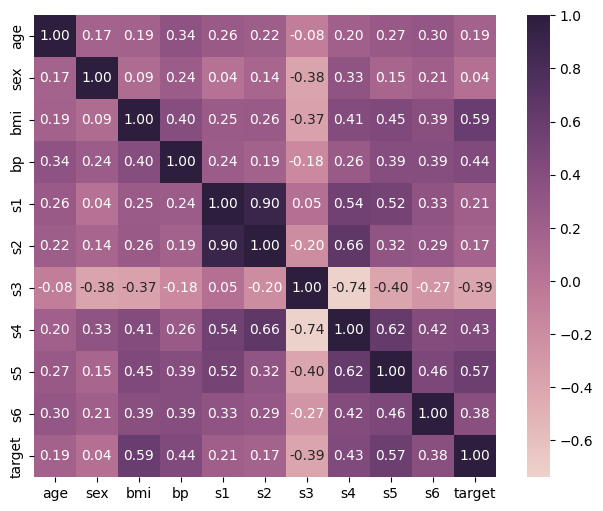

In [10]:
# Create a heatmap to visualize the correlation matrix of the dataset
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True),fmt=".2f")
plt.show()


Here are the key insights from the correlation matrix:

* **BMI (Body Mass Index)**:
    
    BMI has a strong positive correlation of 0.59 with diabetes progression (target). This means there's a noticeable relationship between BMI and the severity of diabetes progression. As BMI increases, diabetes progression tends to worsen.

* **Blood Pressure (bp)**:

    Blood pressure (bp) has a moderate positive correlation of 0.44 with diabetes progression (target). This suggests there might be a link between blood pressure levels and the progression of diabetes. In other words, higher blood pressure levels may indicate a higher risk or severity of diabetes.

* **Blood Serum Measurements**:

    Strong positive correlations are observed among blood serum measurements (s1 to s6), especially between s1 and s2 (correlation coefficient of 0.9). This indicates strong connections or dependencies within the blood serum measurements. Essentially, changes in one blood serum measurement may often coincide with changes in another, suggesting they might be influenced by similar factors.

S1 and S2 exhibit multicollinearity, meaning they are strongly correlated with each other. However, S1 shows a higher correlation with the target variable (diabetes progression) compared to S2. This suggests that S1 provides more valuable information for predicting diabetes progression. Since S1 already captures much of the relationship with the target variable, including S2 in the model may not add significant additional insights. Therefore, removing S2 from the modeling process can help simplify the model without sacrificing predictive accuracy, making it easier to interpret and more efficient.

#### **3. Histograms**

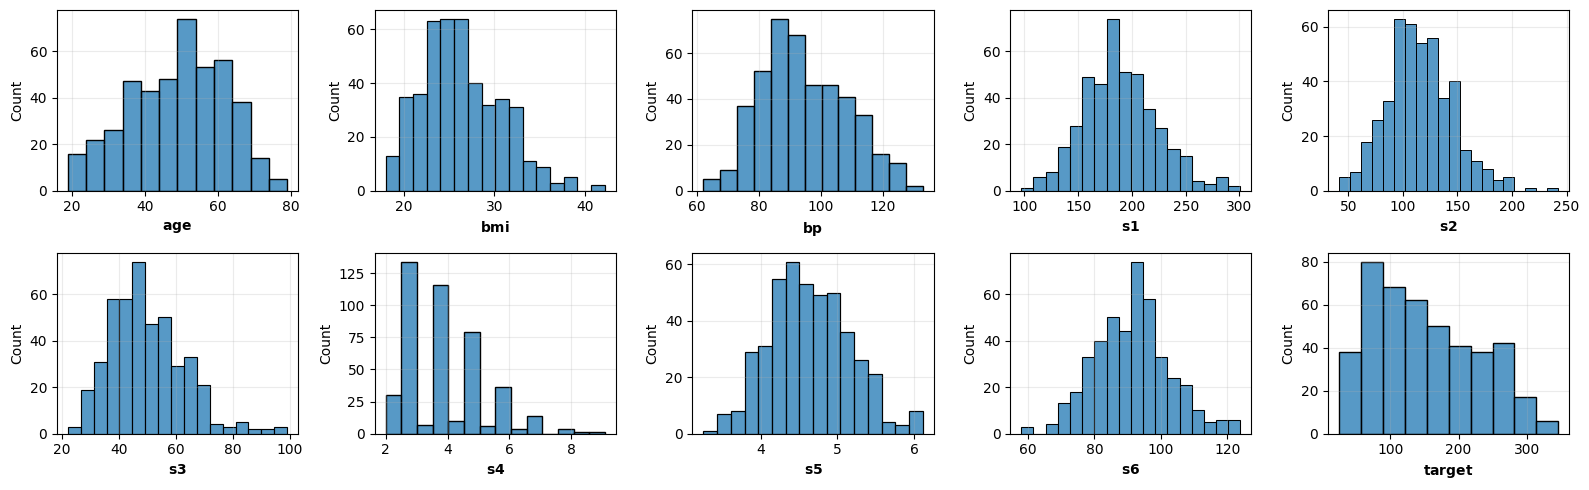

In [23]:
# Creating a histogram subplot grid to visualize the distribution of selected features and the target variable.
plt.figure(figsize=(16,5))

# Iterate over the selected columns for visualization
for i, col in enumerate(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']):
    plt.subplot(2,5,i+1)
    sns.histplot(df[col])
    plt.grid(alpha=0.25)
    plt.xlabel("$\\bf{"+col+"}$")
plt.tight_layout()
plt.show()

Upon reviewing the histogram plots in the grid, we observed that nearly all variables exhibit a normal distribution, except for s4, which shows a slight right skewness. This skewness in s4 could potentially be attributed to the presence of outliers.

#### **4. Boxplots**

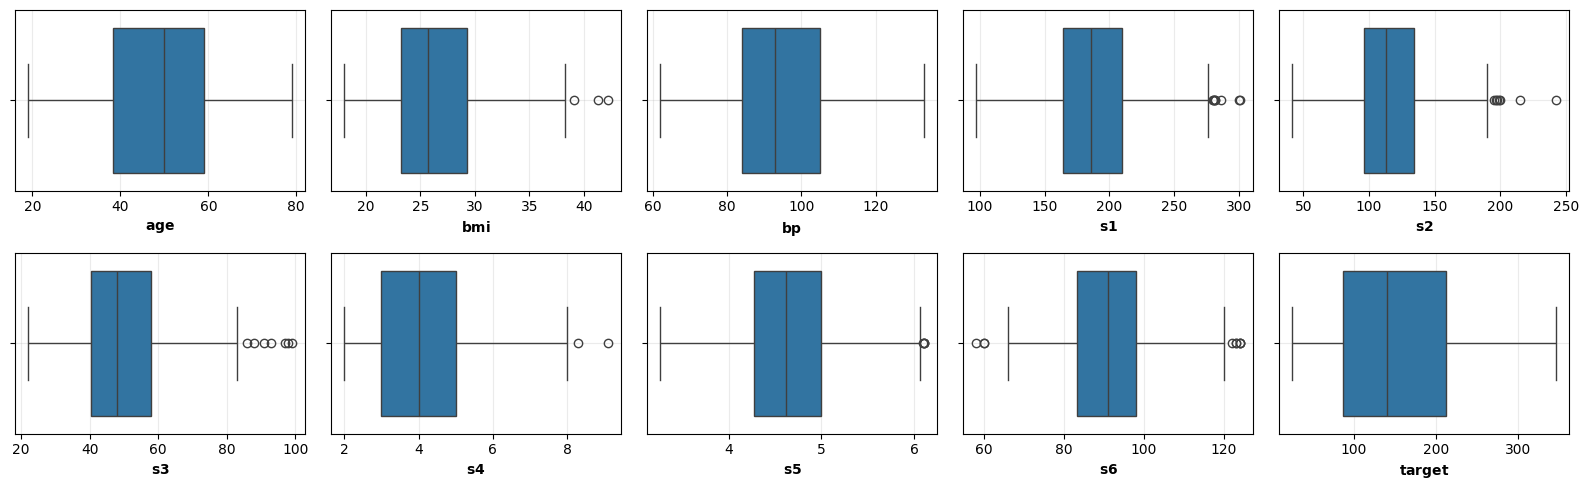

In [10]:
# Creating a boxplot subplot grid to visualize the distribution and detect potential outliers of selected features and the target variable.
plt.figure(figsize=(16,5))

# Iterate over the selected columns for visualization
for i, col in enumerate(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']):
    plt.subplot(2,5,i+1)
    sns.boxplot(x=df[col])
    plt.grid(alpha=0.25)
    plt.xlabel("$\\bf{"+col+"}$")
plt.tight_layout()
plt.show()


By examining the boxplots in the grid, we noticed a handful of outliers on the right side in BMI, s1, s2, s3, s4, and s5. Additionally, there are outliers on both the left and right sides of s6. While these outliers are present, they are considered meaningful and, therefore, should be retained in our analysis.

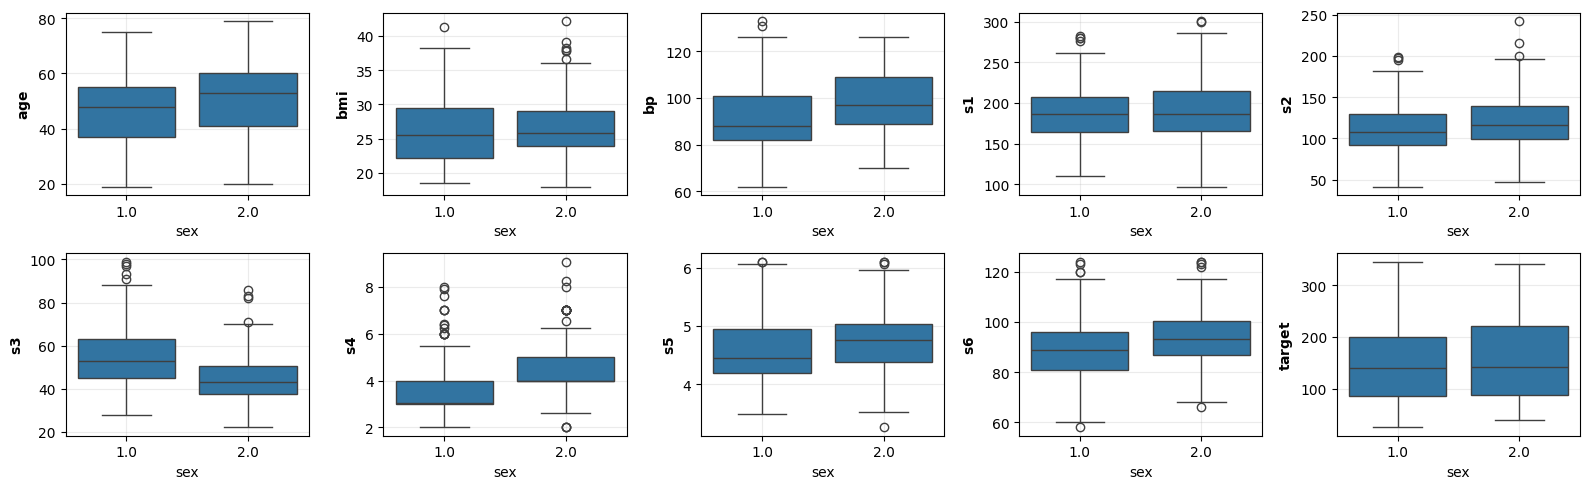

In [11]:
# Creating a boxplot subplot grid to visualize the distribution and detect potential outliers of selected features and the target variable.
plt.figure(figsize=(16,5))

# Iterate over the selected columns for visualization
for i, col in enumerate(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=df[col], x=df['sex'])
    plt.grid(alpha=0.25)
    plt.ylabel("$\\bf{"+col+"}$")
plt.tight_layout()
plt.show()

**Age Variation by Gender**:

Gender 2 tends to have a higher median age and more variability in ages compared to gender 1.

**Blood Pressure Differences**:

Blood pressure readings for gender 2 are generally higher than those for gender 1.

**Cholesterol Levels (S1 and S2)**:

Gender 2 tends to have higher levels of total serum cholesterol and low-density lipoproteins (LDL) compared to gender 1.

**High-Density Lipoproteins (S3)**:

Gender 2 typically has lower levels of high-density lipoproteins (HDL) compared to gender 1.

**Other Serum Measurements (S4, S5, S6)**:

Gender 2 shows higher levels of total cholesterol, serum triglycerides, and blood sugar compared to gender 1.

#### **5. Scatterplot**

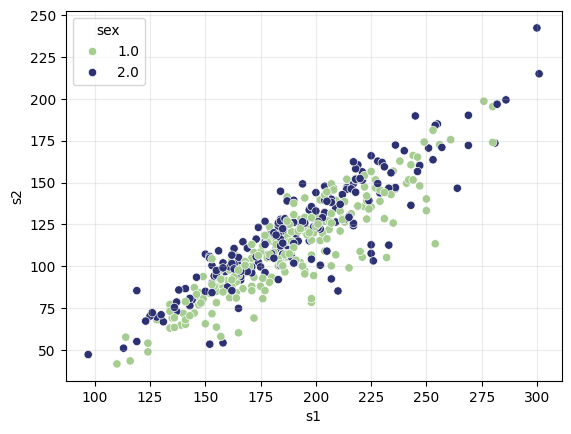

In [12]:
# Creating a scatterplot to visualize the relationship between BMI (Body Mass Index) and the target variable (diabetes progression).
sns.scatterplot(df, x="s1", y="s2", hue="sex", palette="crest")
plt.grid(alpha=0.25)
plt.show()

In the scatterplot, where BMI is plotted against the target variable representing diabetes progression, we observe a general upward trend, indicating a positive relationship. However, the spread of points is not perfectly aligned in a straight line. This means that while there is an overall tendency for higher BMI values to correspond to higher diabetes progression, individual data points show some variability around this trend. In other words, the scatterplot reflects a positive linear spread, but it's not perfect; there's some natural fluctuation in the data points.

### **III - Data Preprocessing**

In [11]:
# Importing necessary libraries for train-test split
from sklearn.model_selection import train_test_split

# Setting a seed for reproducibility
import random
random.seed(7)

# Extracting features (X) and target variable (y) for the model, removing 's2' due to multicollinearity
X = df[['age', 'sex','bmi', 'bp', 's1', 's3', 's4', 's5', 's6']]
y = df['target']

# Performing a two-way split for training (85%), and test (15%) sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=19, stratify=X["sex"])

# Display dimensions of the data sets
print("Train size : ", X_train.shape)
print("Test size  : ", X_test.shape)

Train size :  (375, 9)
Test size  :  (67, 9)


### **IV - Model selection and Training**

In [12]:
# Importing necessary libraries for regression and model evaluation
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, r2_score, mean_absolute_error
import numpy as np

In [13]:
# Creating a pipeline for polynomial regression with PolynomialFeatures, StandardScaler, and LinearRegression
def create_model_pipeline(degree):
    # Define a pipeline with PolynomialFeatures, StandardScaler, and LinearRegression
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])
    return pipeline

# List to store different regression models
model_list = {
    "pol-1" : create_model_pipeline(1),
    "pol-2" : create_model_pipeline(2),
    "pol-3" : create_model_pipeline(3),
    "dtr-2" : DecisionTreeRegressor(max_depth=2),
    "dtr-3" : DecisionTreeRegressor(max_depth=3),
    "dtr-4" : DecisionTreeRegressor(max_depth=4),
    "knn-3" : KNeighborsRegressor(n_neighbors=3),
    "knn-4" : KNeighborsRegressor(n_neighbors=4),
    "knn-5" : KNeighborsRegressor(n_neighbors=5),
}

# Dictionary to store regression results for analysis and comparison
model_results = {
    "Model": [],
    "Mean MAE": [],
    "Std MAE": [],
    "Mean MAPE" : [],
    "Std MAPE" : [],
    "Mean R2S" : [],
    "Std R2S" : [],
}

In [14]:
# X_train, y_train are features and labels in the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create scorer objects for MAE, MAPE, and R-squared
scoring_metrics = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']

# Perform cross-validation
for mod in model_list.keys():
    cross_val_scores = cross_validate(model_list[mod], X_train, y_train, cv=k_fold, scoring=scoring_metrics)
    model_results["Model"].append(mod)
    model_results["Mean MAE"].append(-cross_val_scores['test_neg_mean_absolute_error'].mean())
    model_results["Std MAE"].append(cross_val_scores['test_neg_mean_absolute_error'].std())
    model_results["Mean MAPE"].append(-cross_val_scores['test_neg_mean_absolute_percentage_error'].mean())
    model_results["Std MAPE"].append(cross_val_scores['test_neg_mean_absolute_percentage_error'].std())
    model_results["Mean R2S"].append(cross_val_scores['test_r2'].mean())
    model_results["Std R2S"].append(cross_val_scores['test_r2'].std())

In [16]:
# Make data frame of the results dictionary
cv_results = pd.DataFrame(model_results).round(4)
cv_results

,Model,Mean MAE,Std MAE,Mean MAPE,Std MAPE,Mean R2S,Std R2S
0,pol-1,44.9663,3.0582,0.3976,0.0176,0.4833,0.0773
1,pol-2,49.1209,4.0167,0.4305,0.0333,0.3820,0.1112
2,pol-3,126.6717,10.6689,1.0635,0.2113,-6.5276,3.3911
3,dtr-2,49.8945,4.6211,0.4452,0.0219,0.3439,0.1042
4,dtr-3,50.0358,3.7775,0.4429,0.0280,0.3512,0.1042
5,dtr-4,49.0171,2.6121,0.4278,0.0148,0.3681,0.0937
6,knn-3,57.2898,4.1036,0.4899,0.0196,0.1383,0.1220
7,knn-4,56.9380,3.9526,0.4952,0.0322,0.1852,0.1034
8,knn-5,54.7957,2.9110,0.4834,0.0389,0.2599,0.0607


**Mean Absolute Error (MAE)**:

- MAE measures how close the model's predictions are to the actual values. Lower MAE means the model's predictions are closer to truth.
- Among polynomial models, "pol-1" (Polynomial with degree 1) has the lowest MAE, indicating it makes the most accurate predictions.
- Among decision tree regressors, "dtr-4" (Decision tree with max_depth 4) has the lowest MAE, showing good prediction.
- Among k-nearest neighbors regressors, "knn-5" (Nearest neighbor of 5)has the lowest MAE, suggesting accurate predictions.

**Mean Absolute Percentage Error (MAPE)**:

- MAPE measures the percentage difference between predicted and actual values. Lower MAPE means the model's predictions are more accurate.
- Similar to MAE, "pol-1" has the lowest MAPE among polynomial models, indicating accurate predictions.
- Among decision tree regressors, "dtr-4" has the lowest MAPE, showing good accuracy.
- Among k-nearest neighbors regressors, "knn-5" has the lowest MAPE, suggesting accurate predictions.

**Mean R-squared (R2S)**:

- R-squared measures how well the model explains the variance in the target variable. Higher R-squared means the model is better at explaining the data.
- "pol-1" has the highest R-squared among polynomial models, indicating it explains the data well.
- "dtr-4" has the highest R-squared among decision tree regressors, indicating it explains the data welr.
- "knn-5" has the highest R-squared among k-nearest neighbors regressors, indicating it explains the data wel.

**Overall**:

- Based on these results, "pol-1" seems to be the best model among polynomial models for accurate predictions.
- "dtr-4" appears to be the best model among decision tree regressors for accuracy.
- "knn-5" seems to be the best model among k-nearest neighbors regressors for accurate predictions.

So we take "pol-1" for training and testing

### **V - Model evaluation**

In [17]:
# Traing the best model with training set
best_model = model_list['pol-1'].fit(X_train, y_train)

# Evaluate mdoel on train set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)
map = mean_absolute_percentage_error(y_test, y_pred)

# Evaluate on test set
test_results = pd.DataFrame([['MAE', mae],['MAPE', map],['R2', r2s]], columns=['Metric', 'Score'])
test_results

,Metric,Score
0,MAE,43.396006
1,MAPE,0.428808
2,R2,0.459134


The test results indicate that our model performs reasonably well in predicting the target variable. While the MAE and MAPE scores suggest that there is still room for improvement in terms of prediction accuracy, the R2 score demonstrates that our model can explain a significant portion of the variance in the target variable. Overall, these test results provide valuable insights into the performance of our model on unseen data, helping us assess its effectiveness and guiding further refinement if necessary.

#### **Polynomial Regression plot with degee 1**

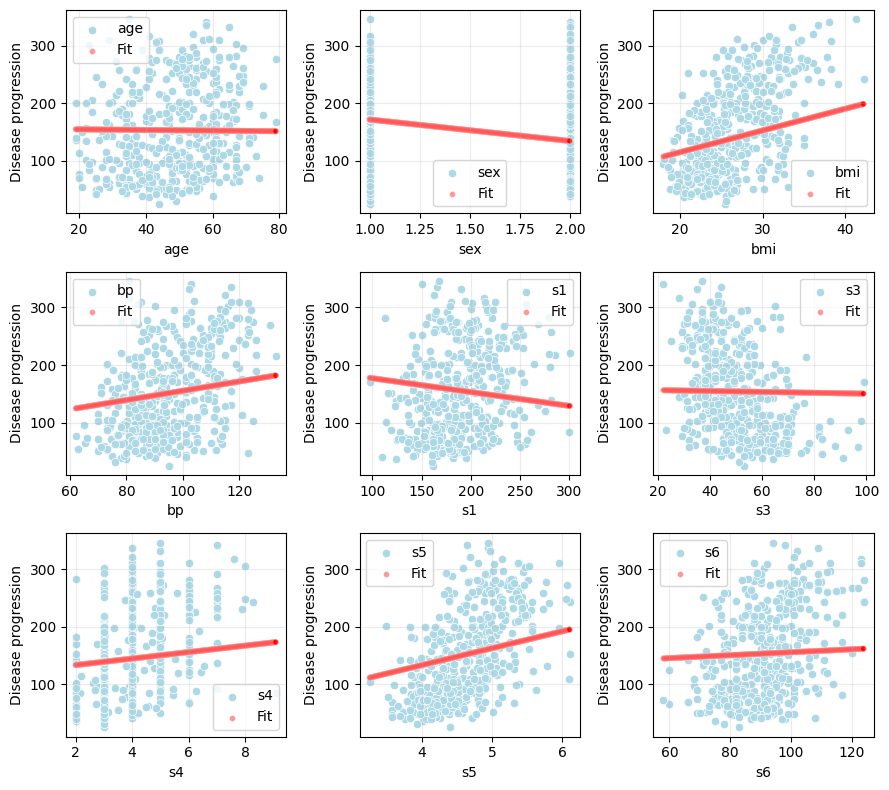

In [23]:
plt.figure(figsize=(9,8))

for i, col in enumerate(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6']):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=df, x=col, y='target', color="lightblue")
    # Scatterplot for the model fit
    x_range = np.linspace(df[col].min(), df[col].max(), len(df[col]))
    x_range_scaled = best_model["scaler"].fit_transform(x_range.reshape(-1,1))
    y_prediction = best_model['linear_regression'].coef_[i+1]*x_range_scaled.reshape(-1) + best_model['linear_regression'].intercept_
    sns.scatterplot(x=x_range, y=y_prediction,size=1, alpha=0.4, color="red")
    plt.legend([col, 'Fit'])
    plt.ylabel('Disease progression')
    plt.grid(alpha=0.25)

plt.tight_layout()    
plt.show()
    

### **VI - Conclusion**

Overall, our diabetes progression prediction model performs reasonably well, with predictions that are close to the actual values on average. However, there are areas where the model may struggle, particularly in accurately predicting extreme cases or capturing complex relationships in the data. Additionally, the model's performance may vary when applied to different populations or time periods. Despite these limitations, the model provides valuable insights and can be a useful tool for guiding decision-making. Moving forward, refinement and validation will be important to improve the model's accuracy and reliability in real-world scenarios

In [25]:
# !jupyter nbconvert --to html Practical_lab5.ipynb